# 为什么用numpy
* c语言编写  
* * Numpy数组内的数据类型统一，连续存储在内存中  
* 多线程执行,python有线程锁

In [48]:
import numpy as np

In [49]:
#  单位矩阵
np.eye(3) ## 单位长度

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [50]:
# 线性矩阵 初始1， 结束15， 步长 2 [1, 15)
np.arange(1,15,2)

array([ 1,  3,  5,  7,  9, 11, 13])

In [51]:
# 创建3*5的数组 全部为3.3
np.full((3,5), 3.3)

array([[3.3, 3.3, 3.3, 3.3, 3.3],
       [3.3, 3.3, 3.3, 3.3, 3.3],
       [3.3, 3.3, 3.3, 3.3, 3.3]])

In [52]:
# 等差数列a (start, end, num)
# np.linspace(1, 5, 5, dtype='int')
np.linspace(1, 3, 5)

array([1. , 1.5, 2. , 2.5, 3. ])

In [53]:
# 等比数列 10 的0~9次方
np.logspace(0,9, 10)

array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07,
       1.e+08, 1.e+09])

In [54]:
# 均匀分布0~1随机数列 size=形状
np.random.random(5)
# np.random.random((2,4))

array([0.56672985, 0.0161155 , 0.21522882, 0.42059873, 0.68286974])

In [55]:
# 高斯分布/正态分布
# np.random.normal(loc, scale, size)
# loc(float): 正态分布的均值， 对应这个分布的中心值  loc = 0 表示这是一个以y轴为对称轴的正态分布
# scale(float):正态分布的标准差，对应分布的宽度，scale越大，正态分布的曲线越矮胖，scale越小，曲线越高瘦
# size(Union[int, iterable, tuple[int], None]) = None 输出赋值形状
np.random.normal(0, 2, 7)

array([-1.89746223, -0.33830555, -0.43152731,  4.95811294, -1.17545815,
        1.77279971,  2.41667132])

In [56]:
# 随机整数
# 最大 最小值 shape
np.random.randint(1,10,(3,3))

array([[8, 9, 5],
       [3, 8, 9],
       [7, 3, 3]])

In [57]:
# 随机重排列
x = np.array([10, 20, 30, 40])
print(x, id(x))
x1 = np.random.permutation(x) # 生成新子序列
print(x1, id(x1))
np.random.shuffle(x) # 修改原序列
print(x, id(x))

[10 20 30 40] 2278483921776
[30 20 10 40] 2278483921456
[30 40 20 10] 2278483921776


In [58]:
# 随机采样
x = np.arange(1, 25, dtype = int)
print(x)
tmp = np.random.choice(x, size=(4,3)) # 在内容采样
print(tmp)
tmp = np.random.choice(x, size=(4,3), p = x/np.sum(x)) # 按概率采样
print(tmp)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
[[21 14  8]
 [24  1 15]
 [16 20  2]
 [11 15  5]]
[[24 11 16]
 [22 20 20]
 [10 21 15]
 [10 10 22]]


# numpy内部性质
* shape=形状  
* dnim=维度[dimension]
* dtype=数组类型 

In [59]:
# 数组的变形
x5 = np.random.randint(1,10, (12,))
print(x5, x5.shape, id(x5))

[8 5 7 3 6 3 7 5 2 8 9 3] (12,) 2278483817536


In [60]:
# reshape改变形状，返回视图
x6 = np.reshape(x5, (3,4))
print(x6, x6.shape, id(x6))
print(x5, x5.shape, id(x5))
x6[0,0] = 0 #%% 仍然会修改原数组
print(x6, x6.shape, id(x6))
print(x5, x5.shape, id(x5))

[[8 5 7 3]
 [6 3 7 5]
 [2 8 9 3]] (3, 4) 2278483710560
[8 5 7 3 6 3 7 5 2 8 9 3] (12,) 2278483817536
[[0 5 7 3]
 [6 3 7 5]
 [2 8 9 3]] (3, 4) 2278483710560
[0 5 7 3 6 3 7 5 2 8 9 3] (12,) 2278483817536


In [61]:
print(np.newaxis)
# 一维数据转行向量
x6 = x5.reshape(1,x5.shape[0])
print(x5, x5.shape[0])
x6

None
[0 5 7 3 6 3 7 5 2 8 9 3] 12


array([[0, 5, 7, 3, 6, 3, 7, 5, 2, 8, 9, 3]])

In [62]:
#或者使用np.newaxis
x7 = x5[np.newaxis, :]
x7

array([[0, 5, 7, 3, 6, 3, 7, 5, 2, 8, 9, 3]])

In [63]:
#多维转一维
x8 = np.random.randint(1,10, (3,4))

# flatten  返回副本/修改不影响原有
x9 = x8.flatten()
print(x9)
x9[0] = 0
print(x8)
print(x9)
# ravel 返回视图
x10 = x8.ravel()
x10[0] = 0
print(x8)
print(x10)
# reshape 返回视图
x11 = x8.reshape(-1) # -1强行转1维数
x11[0] = 11
print(x8)
print(x11)

[8 9 1 7 2 6 6 2 8 1 9 1]
[[8 9 1 7]
 [2 6 6 2]
 [8 1 9 1]]
[0 9 1 7 2 6 6 2 8 1 9 1]
[[0 9 1 7]
 [2 6 6 2]
 [8 1 9 1]]
[0 9 1 7 2 6 6 2 8 1 9 1]
[[11  9  1  7]
 [ 2  6  6  2]
 [ 8  1  9  1]]
[11  9  1  7  2  6  6  2  8  1  9  1]


In [64]:
#np 的拼接 
# 水平拼接
x12 = np.random.randint(1, 10, (3,4))
x13 = np.random.randint(1, 10, (3,4))

# 返回都是视图
a1 = np.hstack([x12, x13])
print(a1)
a1[0][0] = 0
print(x12)
a2 = np.c_[x12, x13]
a2[0][0] = 0
print(a2)
print(x12)

[[4 6 2 8 2 5 1 4]
 [6 8 1 6 5 2 7 1]
 [1 5 6 6 2 7 5 4]]
[[4 6 2 8]
 [6 8 1 6]
 [1 5 6 6]]
[[0 6 2 8 2 5 1 4]
 [6 8 1 6 5 2 7 1]
 [1 5 6 6 2 7 5 4]]
[[4 6 2 8]
 [6 8 1 6]
 [1 5 6 6]]


In [65]:
# 错误测试
# x12_tmp = x12.reshape((2, x12.size // 2))
# a1 = np.hstack([x12_tmp, x13])
# a1
# ValueError: all the input array dimensions except for the concatenation axis must match exactly
# ValueError:除连接轴外的所有输入数组维度必须完全匹配
# 维度不匹配

In [66]:
# 垂直拼接
x14 = np.random.randint(1, 10, (3,4))
x15 = np.random.randint(1, 10, (3,4))

a1 = np.vstack([x14, x15])
print(a1)
a1[0][0] = 0
print(x14)
a2 = np.r_[x14, x15]
a2[0][0] = 0
print(a2)
print(x14)

[[3 6 5 5]
 [1 2 7 1]
 [8 6 7 3]
 [8 6 1 8]
 [6 1 4 1]
 [4 1 5 1]]
[[3 6 5 5]
 [1 2 7 1]
 [8 6 7 3]]
[[0 6 5 5]
 [1 2 7 1]
 [8 6 7 3]
 [8 6 1 8]
 [6 1 4 1]
 [4 1 5 1]]
[[3 6 5 5]
 [1 2 7 1]
 [8 6 7 3]]


In [67]:
# 分割数值
# 水平分割
x16 = np.arange(0, 10)
print(x16)
# 把数据分3段，split参数为中间分割点 
a1,a2,a3 = np.split(x16, [2,5])
print(a1,a2,a3)
# 垂直分割 hsplit

[0 1 2 3 4 5 6 7 8 9]
[0 1] [2 3 4] [5 6 7 8 9]


In [68]:
# 多维分割测试
x17 = np.random.randint(1, 10, (3,4))
print("x17", x17)
a1,a2,a3 = np.split(x17, [1,3]) # 截取行
print("a1:", a1, "a2:", a2, "a3:", a3)
# a1,a2,a3 = np.split(x17, [[1,3],1]) # 截取行
# print("a1:", a1, "a2:", a2, "a3:", a3)

x17 [[8 7 6 8]
 [9 8 9 3]
 [7 1 8 6]]
a1: [[8 7 6 8]] a2: [[9 8 9 3]
 [7 1 8 6]] a3: []


In [69]:
# 四则运算可直接使用，对整个矩阵生效
x18 = np.random.randint(1, 10, (3,4)) 
print(x18)
x18 += 1
print(x18)

[[8 1 5 7]
 [7 8 4 3]
 [7 6 2 8]]
[[9 2 6 8]
 [8 9 5 4]
 [8 7 3 9]]


In [70]:
# 常用的函数
# 绝对值 abs() np.abs()

In [71]:
# 三角函数 np.sin() np.cos() np.tan()
# 反三角函数 np.arcsin() np.arccos np.arctan()
theta = np.linspace(0, np.pi, 3) # 等比数列
# theta
print("sin(Theta)",np.sin(theta))
print("cos(Theta)",np.cos(theta))
print("tan(Theta)",np.tan(theta))

sin(Theta) [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(Theta) [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(Theta) [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [72]:
# 指数运算 exp
x = np.arange(3)
print(x)
x_tmp = np.exp(x)

[0 1 2]


In [73]:
# 对数运算
x = np.array([1,2,4])
print(x)
np.log(x) # 1为底数
np.log2(x) # 2为底数
np.log10(x) # 10为底数

[1 2 4]


array([0.        , 0.30103   , 0.60205999])

In [74]:
# 矩阵转置
x = np.random.randint(1, 10, (3,3))
print(x)
y = x.T # 转置标记 x 轴与 y轴置换
print(y)

# 矩阵乘法
tmp = np.dot(x,y)  
print(tmp)
# 两种乘法不一样
tmp = x*y
print(tmp)

[[3 3 3]
 [7 3 8]
 [2 6 8]]
[[3 7 2]
 [3 3 6]
 [3 8 8]]
[[ 27  54  48]
 [ 54 122  96]
 [ 48  96 104]]
[[ 9 21  6]
 [21  9 48]
 [ 6 48 64]]


In [75]:
# 如果两个数组的形状不匹配
# 那么数组的形式会沿着维度为1进行扩展以匹配另一个数组的形状

In [76]:
# 比较运算
x = np.random.randint(1,100, (5,5))
print(x)
tmp = x > 50
print(tmp)

[[16 26 10 97 63]
 [78 80 91 56 19]
 [59 50  7 56 29]
 [83 75 61 36  8]
 [29 47 57  8 44]]
[[False False False  True  True]
 [ True  True  True  True False]
 [ True False False  True False]
 [ True  True  True False False]
 [False False  True False False]]


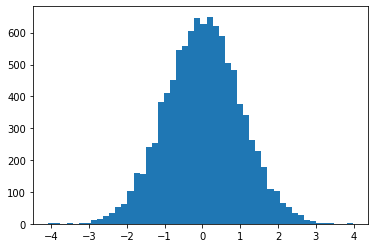

In [80]:
x = np.random.normal(0,1, size=10000)
import matplotlib.pyplot as plt
plt.hist(x, bins = 50)
plt.show()

In [82]:
# 中位数
np.median(x)

0.0228820143248644

In [84]:
# 均值
x.mean()
np.mean(x)

0.020299964254066764

In [86]:
# 方差
x.var()
np.var(x)

0.9822495607056891

In [89]:
# 标准差
x.std()
np.std(x)

0.9910850421158061